In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def plot_f(f, min_x, max_x, l='f'):
    x_axis = np.linspace(min_x, max_x, 100)
    fig, ax = plt.subplots()

    y = [f(x) for x in x_axis]

    ax.plot(x_axis, y, linewidth=3, label=l, c='b')

    # set the spine locations
    #ax.spines['left'].set_position('zero')
    #ax.spines['bottom'].set_position('zero')

    # turn off the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.grid(True, which='both')

    ax.legend()

    return ax

# MLE

In [3]:
def likelihood(theta, counts):
    return (theta**counts[0])*((1-theta)**counts[1])

In [4]:
def loglikelihood(theta, counts):
    return np.log(likelihood(theta, counts))

In [5]:
def loglikelihood_s(theta, counts):
    return counts[0]*np.log(theta)+counts[1]*np.log(1-theta)
    #return np.log(likelihood(theta, counts))

<AxesSubplot:>

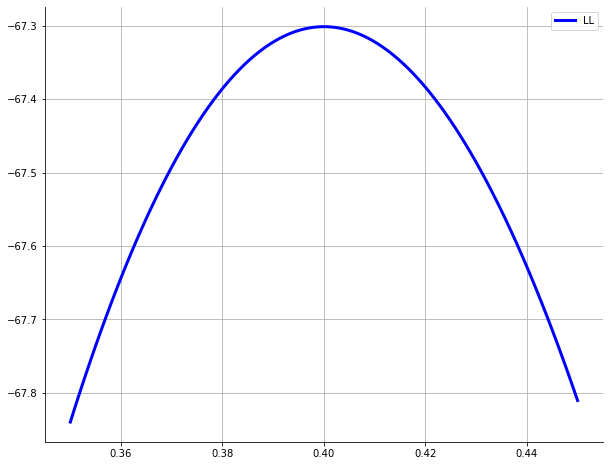

In [6]:
plot_f(lambda t: loglikelihood_s(t, [40, 60]), min_x=0.35, max_x=0.45, l='LL')

# Bayesian

In [7]:
from scipy.stats import beta

In [8]:
def beta_mean(alpha, beta):
    return alpha / (alpha + beta)

def beta_mode(alpha, beta):
    if alpha+beta-2 == 0:
        return np.nan
    return (alpha-1)/ (alpha+beta-2)

def beta_var(alpha, beta):
    return (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))

In [9]:
def print_beta(alpha, beta):
    print("Beta(%d, %d)" %(alpha, beta))
    print("Mean: %0.3f Mode: %0.3f Variance: %0.3f" 
          %(beta_mean(alpha, beta), beta_mode(alpha, beta), beta_var(alpha, beta)))

Beta(1, 1)
Mean: 0.500 Mode: nan Variance: 0.083


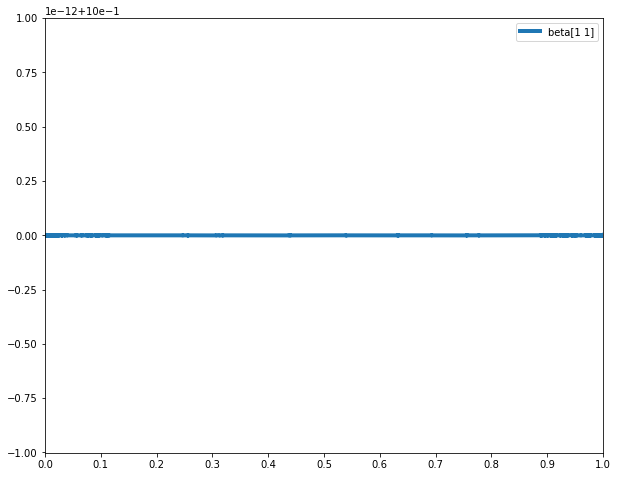

In [17]:
beta_params = np.asarray([1, 1])

print_beta(*beta_params)

lw = 4

x=np.linspace(0, 1, num=10000)

_, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.1))

ax.plot(x, beta.pdf(x, *beta_params), lw=lw, label='beta'+str(beta_params))

ax.legend()

MLE: 0.400

prior
Beta(10, 10)
Mean: 0.500 Mode: 0.500 Variance: 0.012

Data
[4 6]

Posterior
Beta(14, 16)
Mean: 0.467 Mode: 0.464 Variance: 0.008


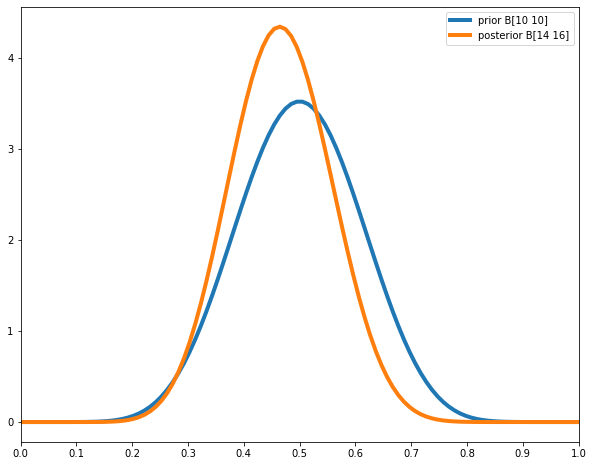

In [24]:
prior = np.asarray([10, 10])
D = np.asarray([4, 6])
posterior = prior + D

print("MLE: %0.3f" %(D[0]/np.sum(D)))
print()

print("prior")
print_beta(*prior)
print()

print("Data")
print(D)
print()

print("Posterior")
print_beta(*posterior)

lw = 4

x=np.linspace(0,1, num=100)

_, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.1))

ax.plot(x,beta.pdf(x, *prior), lw=lw, label='prior B'+str(prior))
#ax.plot(x,beta.pdf(x, *D), lw=lw, label='data')
ax.plot(x,beta.pdf(x, *posterior), lw=lw, label='posterior B'+str(posterior))

ax.legend()

MLE: 0.400

prior
Beta(100, 100)
Mean: 0.500 Mode: 0.500 Variance: 0.001

Posteriors
Data: [40 60]
Beta(140, 160)
Mean: 0.467 Mode: 0.466 Variance: 0.001

Data: [ 80 120]
Beta(180, 220)
Mean: 0.450 Mode: 0.450 Variance: 0.001

Data: [120 180]
Beta(220, 280)
Mean: 0.440 Mode: 0.440 Variance: 0.000

Data: [160 240]
Beta(260, 340)
Mean: 0.433 Mode: 0.433 Variance: 0.000

Data: [200 300]
Beta(300, 400)
Mean: 0.429 Mode: 0.428 Variance: 0.000



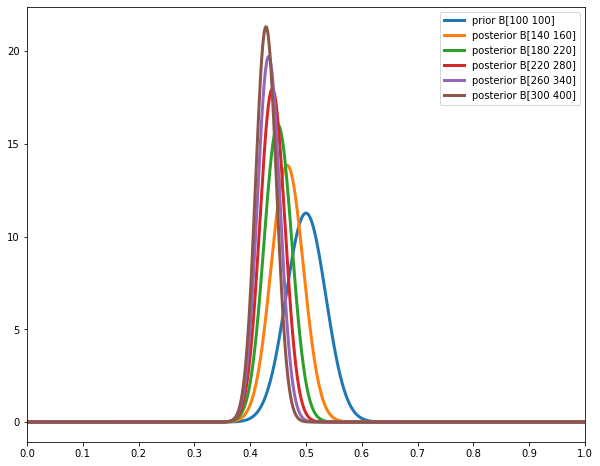

In [27]:
prior = np.asarray([100, 100])
D = np.asarray([40, 60])

lw = 3

x=np.linspace(0,1, num=1000)

_, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.1))

ax.plot(x,beta.pdf(x, *prior), lw=lw, label='prior B'+str(prior))

print("MLE: %0.3f" %(D[0]/np.sum(D)))
print()

print("prior")
print_beta(*prior)
print()

print("Posteriors")

for i in range(1, 6):
    D_n = i*D
    ax.plot(x,beta.pdf(x, *(prior+D_n)), lw=lw, label='posterior B'+ str(prior+D_n))
    print("Data:", D_n)
    print_beta(*(prior+D_n))
    print()

#ax.plot(x,beta.pdf(x, *posterior_s), lw=lw, label='posterior_s')
#ax.plot(x,beta.pdf(x, *posterior_l), lw=lw, label='posterior_l')

ax.legend()